In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np


In [2]:
import theano 
from theano import tensor as T, function

from IPython import display
import time

In [4]:
noise_var = 0.5
n_samples = 1000

n = np.random.normal(0, noise_var, n_samples)
x = np.arange(n_samples)

x = (x-x.mean()) / x.std()

w, b, = np.random.randn(2)


d = w*x + b # Respuesta correcta
y = d + n # Observación con ruido

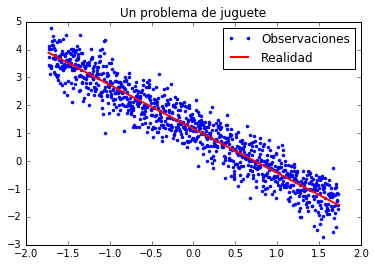

In [5]:
plt.plot(x, y, '.')
plt.plot(x, d, '-r', linewidth=2.0)
plt.legend(('Observaciones', 'Realidad'))
plt.title('Un problema de juguete')

In [6]:
X, Y = T.vectors('entrada', 'real')
W = theano.shared(0.01)
B = theano.shared(0.0)
Z = W*X + B

In [12]:
cost = ((Y - Z)**2).mean()
params = [W, B]  # Esto es lo que debemos de aprender

### ¿Cómo cambiar variables de Theano?

In [8]:
W.get_value() 

array(0.01)

In [9]:
W

<TensorType(float64, scalar)>

In [10]:
updates = ((W, W*2), )
double_w = function([], [], updates=updates)

In [11]:
double_w()
W.get_value()

array(0.02)

## Entrenamiento

In [14]:
## Las actualizaciones son:
## w <- w - alpha*grad(cost, w) 
## b <- b - alpha*grad(cost, b)

alpha = 0.1 # Learning rate

grads = [T.grad(cost, p) for p in params]
updates = [(p, p - alpha*g) for p, g in zip(params, grads)]

print updates

[(<TensorType(float64, scalar)>, Elemwise{sub,no_inplace}.0), (<TensorType(float64, scalar)>, Elemwise{sub,no_inplace}.0)]


In [15]:
train = function([X, Y], cost, updates = updates)

## Visualización

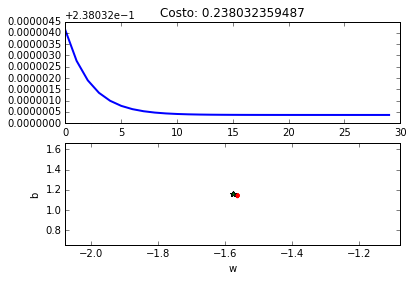

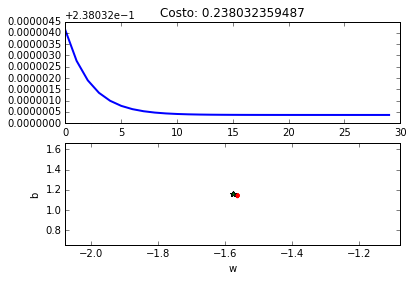

In [22]:
epocas = 30

costo_final = []

for i in range(epocas):
    costo_final.append(train(x, y))
    
    
    what, bhat = W.get_value(), B.get_value()
    
    plt.subplot(211)
    plt.cla()
    plt.title('Costo: {}'.format(costo_final[-1]))
    plt.plot(costo_final, linewidth = 2.0)
    
    plt.subplot(212)
    plt.plot(w,b, '*', linewidth=0.2)
    plt.plot(what, bhat, '.r', linewidth=2.0)
    plt.xlim([w-.5, w+.5])
    plt.ylim([b-.5, b+.5])
    plt.xlabel('w')
    plt.ylabel('b')
    
    display.clear_output(wait=True)
    display.display(plt.gcf())
    time.sleep(1.0)

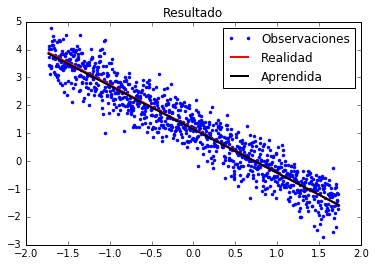

In [21]:
plt.title("Resultado")
plt.plot(x, y, '.')
plt.plot(x, d, 'r', linewidth=2.0)
plt.plot(x, what*x + bhat, 'k', linewidth=2.0)
plt.legend(('Observaciones', 'Realidad', 'Aprendida'))